**Set up the environment

In the following steps, we ensure that our workspace is equipped with the necessary tools for data manipulation, visualization, and statistical analysis.

In [4]:
from tqdm.auto import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy import stats
import seaborn as sns

**Load the data set and use mapping of response labels

Source of data set: https://www.cdc.gov/brfss/annual_data/annual_2023.html

In [9]:
# Load BRFSS data
df_survey = pd.read_csv(r"C:\Users\joyce\usable_ai\project\data\BRFSS2023.csv")

# Preview
df_survey.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4,_RFSEAT2,_RFSEAT3,_DRNKDRV
0,1.0,1.0,3012023,3,1,2023,1100.0,2023000001,2.023000e+09,1.0,...,0.0,1.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,9.0
1,1.0,1.0,1062023,1,6,2023,1100.0,2023000002,2.023000e+09,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,9.0
2,1.0,1.0,3082023,3,8,2023,1100.0,2023000003,2.023000e+09,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,9.0
3,1.0,1.0,3062023,3,6,2023,1100.0,2023000004,2.023000e+09,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0
4,1.0,1.0,1062023,1,6,2023,1100.0,2023000005,2.023000e+09,1.0,...,7.0,1.0,47.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0


**Data Familiarization

Identify data types: Understand what kind of data each column holds (e.g., numerical, categorical).

Count entries: Check the total number of rows to gauge the dataset's size.

Examine ranges: Look at the minimum and maximum values for numerical columns.

Sample entries: Display a few rows to visually inspect the data.

Review unique values: For categorical variables, list unique values to understand the diversity in the data.

In [11]:
# See info
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433323 entries, 0 to 433322
Columns: 350 entries, _STATE to _DRNKDRV
dtypes: float64(345), int64(5)
memory usage: 1.1 GB


In [61]:
# 433,323  records | 350 columns

# See info as a data frame
df_info = pd.DataFrame({
    'Column': df_survey.columns,
    'Null Count': df_survey.isnull().sum().values,
    'Dtype': df_survey.dtypes.values
})

# Print all
with pd.option_context('display.max_rows', None):
    print(df_info)

             Column  Null Count    Dtype
0            _STATE           0  float64
1            FMONTH           0  float64
2             IDATE           0    int64
3            IMONTH           0    int64
4              IDAY           0    int64
5             IYEAR           0    int64
6          DISPCODE           0  float64
7             SEQNO           0    int64
8              _PSU           0  float64
9          CTELENM1      344978  float64
10         PVTRESD1      344978  float64
11         COLGHOUS      433311  float64
12         STATERE1      344978  float64
13         CELPHON1      344977  float64
14          LADULT1      344978  float64
15         NUMADULT      344993  float64
16         RESPSLC1      380937  float64
17         LANDSEX2      362850  float64
18         LNDSXBRT      433154  float64
19         SAFETIME       88345  float64
20         CTELNUM1       88345  float64
21         CELLFON5       88345  float64
22          CADULT1       88345  float64
23         CELLS

In [63]:
# Load mapping dictionary
df_map = pd.read_csv(r"C:\Users\joyce\usable_ai\project\data\2023_Mapping_Dictionary.csv")

# Create a dictionary of dictionaries: {column: {value: label}}
mapping_dict = {
    var: grp.set_index("Value")["Value_Label"].to_dict()
    for var, grp in df_map.groupby("Variable_Name")
}

# Make a copy of the original to preserve raw values if needed
df_survey_labeled = df_survey.copy()

# Apply the mapping to relevant columns
for col in df_survey.columns:
    if col in mapping_dict:
        df_survey_labeled[col] = df_survey[col].map(mapping_dict[col])

#print (df_survey_labeled)
df_survey_labeled.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4,_RFSEAT2,_RFSEAT3,_DRNKDRV,MI_YES,KD_YES,DUAL_DIAGNOSIS
0,Alabama,January,3012023,March,Interview Day,408012,Completed Interview,2023000001,2.023000e+09,"Yes - Go to LL.02, PVTRESD1",...,No\nNotes: (SEXVAR=1) and _DRNKWK2 <= 1400 or ...,No\nNotes: AGE >=65 and FLUSHOT7 = 2,No\nNotes: AGE >= 65 and PNEUVAC4 = 2,No\nNotes: HIVTST7 = 2,Always or Almost Always Wear Seat Belt,Always Wear Seat Belt,Don't know/Not Sure/Refused/Missing,0,0,0
1,Alabama,January,1062023,January,15763,408012,Completed Interview,2023000002,2.023000e+09,"Yes - Go to LL.02, PVTRESD1",...,No\nNotes: (SEXVAR=1) and _DRNKWK2 <= 1400 or ...,Yes\nNotes: AGE >=65 and FLUSHOT7 = 1,Yes\nNotes: AGE >= 65 and PNEUVAC4 = 1,No\nNotes: HIVTST7 = 2,Always or Almost Always Wear Seat Belt,Always Wear Seat Belt,Don't know/Not Sure/Refused/Missing,0,0,0
2,Alabama,January,3082023,March,15583,408012,Completed Interview,2023000003,2.023000e+09,"Yes - Go to LL.02, PVTRESD1",...,No\nNotes: (SEXVAR=1) and _DRNKWK2 <= 1400 or ...,Yes\nNotes: AGE >=65 and FLUSHOT7 = 1,Yes\nNotes: AGE >= 65 and PNEUVAC4 = 1,No\nNotes: HIVTST7 = 2,Always or Almost Always Wear Seat Belt,Always Wear Seat Belt,Don't know/Not Sure/Refused/Missing,0,0,0
3,Alabama,January,3062023,March,15763,408012,Completed Interview,2023000004,2.023000e+09,"Yes - Go to LL.02, PVTRESD1",...,No\nNotes: (SEXVAR=1) and _DRNKWK2 <= 1400 or ...,Yes\nNotes: AGE >=65 and FLUSHOT7 = 1,Yes\nNotes: AGE >= 65 and PNEUVAC4 = 1,Yes\nNotes: HIVTST7 = 1,Always or Almost Always Wear Seat Belt,Always Wear Seat Belt,Don't know/Not Sure/Refused/Missing,0,0,0
4,Alabama,January,1062023,January,15763,408012,Completed Interview,2023000005,2.023000e+09,"Yes - Go to LL.02, PVTRESD1",...,No\nNotes: (SEXVAR=1) and _DRNKWK2 <= 1400 or ...,No\nNotes: AGE >=65 and FLUSHOT7 = 2,Yes\nNotes: AGE >= 65 and PNEUVAC4 = 1,No\nNotes: HIVTST7 = 2,Always or Almost Always Wear Seat Belt,Always Wear Seat Belt,Have not driven after having too much to drink,0,0,0


In [69]:
# How many completed the survey?

df_survey_labeled['DISPCODE'].value_counts()

DISPCODE
Completed Interview           356261
Partial Complete Interview     77062
Name: count, dtype: int64

In [71]:
# Isolate analysis to completed interviews only

df_completed = df_survey_labeled[df_survey_labeled['DISPCODE'] == 'Completed Interview']

In [73]:
# Count of people who reported having had a heart attack
mi_count = (df_completed['CVDINFR4'] == 'Yes').sum()

print(mi_count)

19572


In [75]:
# Count of people who reported having kidney disease
kd_count = (df_completed['CHCKDNY2'] == 'Yes').sum()

print(kd_count)

17546


In [77]:
# Count of people who reported both kidney disease and heart attack

dual_condition_count = ((df_completed['CHCKDNY2'] == 'Yes') & (df_completed['CVDINFR4'] == 'Yes')).sum()

print (dual_condition_count)

2967


In [79]:
# Age breakdown

df_survey_labeled['_AGE80'].value_counts()

_AGE80
80.0    38884
65.0    10050
70.0     9984
72.0     9437
67.0     9393
        ...  
22.0     3892
21.0     3704
20.0     3570
19.0     3568
18.0     3242
Name: count, Length: 63, dtype: int64

Heart Attack History Counts:
CVDINFR4
No                     334771
Yes                     19572
Don't know/Not sure      1760
Refused                   158
Name: count, dtype: int64

Kidney Disease History Counts:
CHCKDNY2
No                       337199
Yes                       17546
Don't know / Not sure      1336
Refused                     180
Name: count, dtype: int64


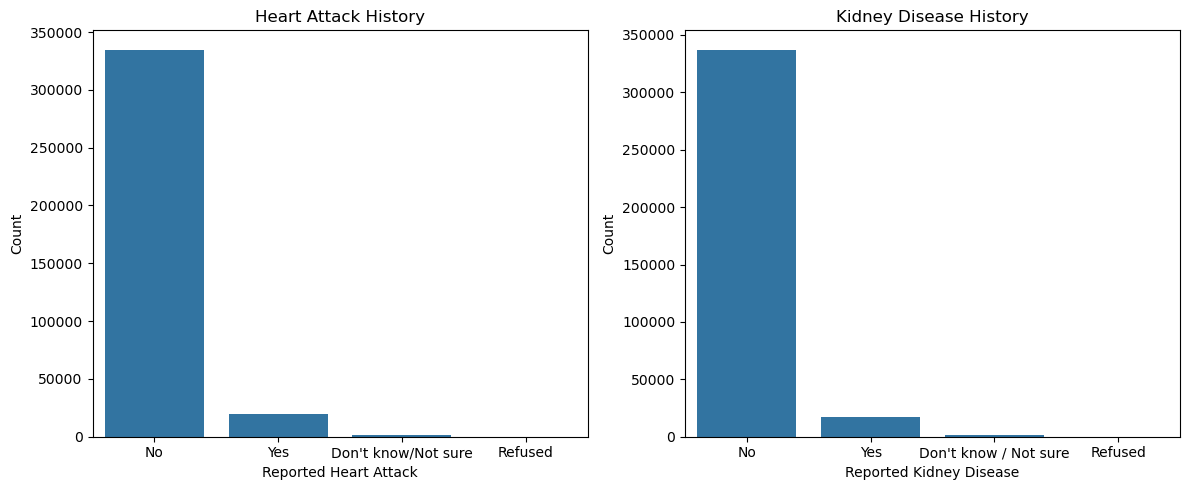

In [81]:
# Count values
heart_counts = df_completed['CVDINFR4'].value_counts()
kidney_counts = df_completed['CHCKDNY2'].value_counts()

# Print counts
print("Heart Attack History Counts:")
print(heart_counts)
print("\nKidney Disease History Counts:")
print(kidney_counts)

# Count plots
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df_completed, x='CVDINFR4', order=heart_counts.index)
plt.title('Heart Attack History')
plt.xlabel('Reported Heart Attack')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(data=df_completed, x='CHCKDNY2', order=kidney_counts.index)
plt.title('Kidney Disease History')
plt.xlabel('Reported Kidney Disease')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Gender Distribution: Heart Attack
LANDSEX2
Male                   2888
Female                 2210
Refused                   5
Don't know/Not Sure       4
Name: count, dtype: int64 



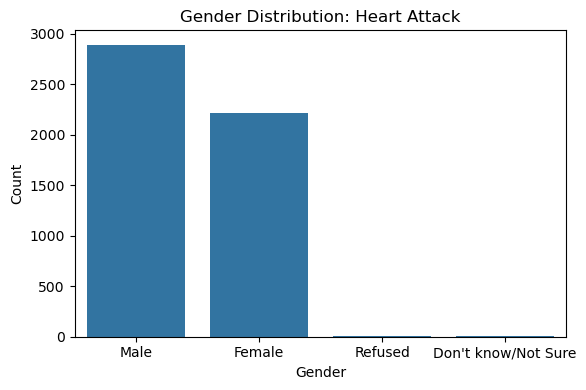

Gender Distribution: Kidney Disease
LANDSEX2
Female                 2780
Male                   1814
Don't know/Not Sure       4
Refused                   1
Name: count, dtype: int64 



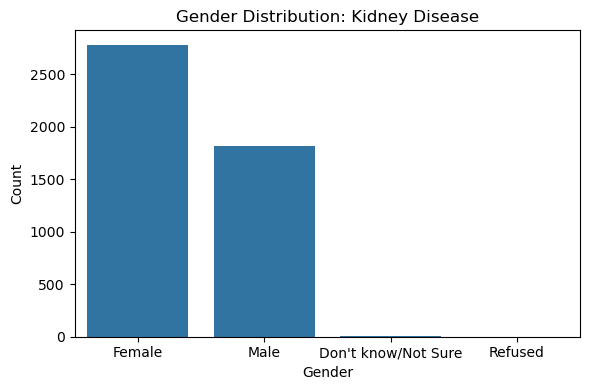

Gender Distribution: Both Heart Attack & Kidney Disease
LANDSEX2
Male                   448
Female                 382
Don't know/Not Sure      1
Name: count, dtype: int64 



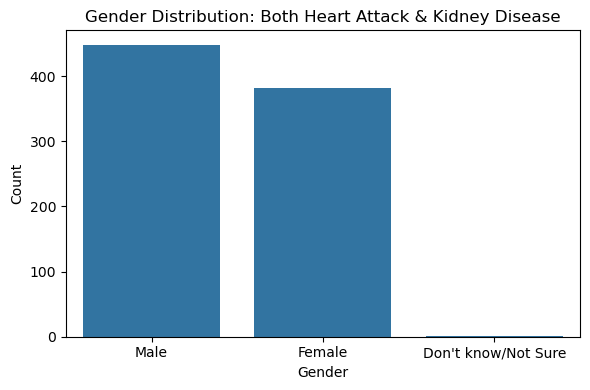

In [63]:
# Gender counts for heart attack
heart_gender_counts = df_completed[df_completed['CVDINFR4'] == 'Yes']['LANDSEX2'].value_counts()
print("Gender Distribution: Heart Attack")
print(heart_gender_counts, "\n")

# Plot
plt.figure(figsize=(6, 4))
sns.countplot(data=df_completed[df_completed['CVDINFR4'] == 'Yes'], x='LANDSEX2', order=heart_gender_counts.index)
plt.title('Gender Distribution: Heart Attack')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Gender counts for kidney disease
kidney_gender_counts = df_completed[df_completed['CHCKDNY2'] == 'Yes']['LANDSEX2'].value_counts()
print("Gender Distribution: Kidney Disease")
print(kidney_gender_counts, "\n")

# Plot
plt.figure(figsize=(6, 4))
sns.countplot(data=df_completed[df_completed['CHCKDNY2'] == 'Yes'], x='LANDSEX2', order=kidney_gender_counts.index)
plt.title('Gender Distribution: Kidney Disease')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Gender counts for both conditions
dual_gender_counts = df_completed[(df_completed['CHCKDNY2'] == 'Yes') & (df_completed['CVDINFR4'] == 'Yes')]['LANDSEX2'].value_counts()
print("Gender Distribution: Both Heart Attack & Kidney Disease")
print(dual_gender_counts, "\n")

# Plot
plt.figure(figsize=(6, 4))
sns.countplot(
    data=df_completed[(df_completed['CHCKDNY2'] == 'Yes') & (df_completed['CVDINFR4'] == 'Yes')],
    x='LANDSEX2',
    order=dual_gender_counts.index
)
plt.title('Gender Distribution: Both Heart Attack & Kidney Disease')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [83]:
# Average age of those with heart attack
mdn_age_mi = df_completed.loc[df_completed['CVDINFR4'] == 'Yes', '_AGE80'].median()

# Average age of those with kidney disease
mdn_age_kd = df_completed.loc[df_completed['CHCKDNY2'] == 'Yes', '_AGE80'].median()

# Average age of those with both conditions
mdn_age_both = df_completed.loc[
    (df_completed['CHCKDNY2'] == 'Yes') & (df_completed['CVDINFR4'] == 'Yes'),
    '_AGE80'
].median()

print(f"Median age of those with heart attack: {mdn_age_mi:.2f}")
print(f"Median age of those with kidney disease: {mdn_age_kd:.2f}")
print(f"Median age of those with both conditions: {mdn_age_both:.2f}")

Median age of those with heart attack: 71.00
Median age of those with kidney disease: 71.00
Median age of those with both conditions: 73.00


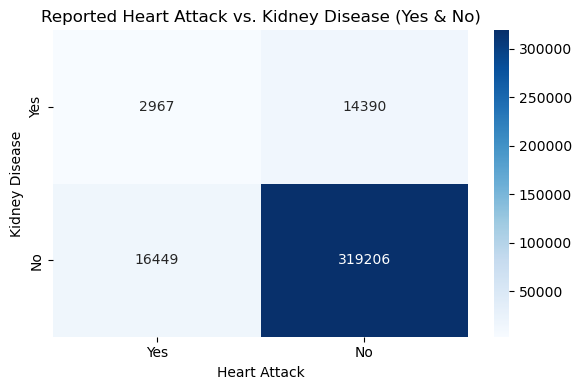

In [85]:
# Create a crosstab showing Yes/No combinations
ct = pd.crosstab(
    df_completed['CHCKDNY2'], 
    df_completed['CVDINFR4'], 
    rownames=['Kidney Disease'], 
    colnames=['Heart Attack']
)

ct_yes_responses = ct.loc[['Yes', 'No'], ['Yes', 'No']]

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(ct_yes_responses, annot=True, fmt='d', cmap='Blues')
plt.title('Reported Heart Attack vs. Kidney Disease (Yes & No)')
plt.tight_layout()
plt.show()

In [45]:
# Create binary outcome column
df_survey["MI_YES"] = (df_survey["CVDINFR4"] == 1).astype(int)

# Invalid values
invalid_values = [7, 8, 9, 77, 88, 99]

# Lifestyle Factors Correlation
lifestyle_cols = ["SMOKE100", "EXERANY2", "DRNKANY6"]
df_lifestyle = df_survey[lifestyle_cols + ["MI_YES"]].replace(invalid_values, np.nan).dropna()

print("Correlation with Heart Attack (Lifestyle Factors):")
for col in lifestyle_cols:
    corr, p = stats.pointbiserialr(df_lifestyle["MI_YES"], df_lifestyle[col])
    print(f"{col}: correlation = {corr:.3f}, p-value = {p:.4f}")

# Chronic Conditions Correlation
chronic_cols = ["DIABETE4", "CHCCOPD3", "CVDSTRK3", "CVDCRHD4", "BPMEDS1", "TOLDHI3"]
df_chronic = df_survey[chronic_cols + ["MI_YES"]].replace(invalid_values, np.nan).dropna()

print("\nCorrelation with Heart Attack (Chronic Conditions):")
for col in chronic_cols:
    corr, p = stats.pointbiserialr(df_chronic["MI_YES"], df_chronic[col])
    print(f"{col}: correlation = {corr:.3f}, p-value = {p:.4f}")

# Socioeconomic Factors Correlation
social_cols = ["INCOME3", "EMPLOY1", "PRIMINS1", "MEDCOST1"]
df_social = df_survey[social_cols + ["MI_YES"]].replace(invalid_values, np.nan).dropna()

print("\nCorrelation with Heart Attack (Socioeconomic Factors):")
for col in social_cols:
    corr, p = stats.pointbiserialr(df_social["MI_YES"], df_social[col])
    print(f"{col}: correlation = {corr:.3f}, p-value = {p:.4f}")


Correlation with Heart Attack (Lifestyle Factors):
SMOKE100: correlation = -0.103, p-value = 0.0000
EXERANY2: correlation = 0.086, p-value = 0.0000
DRNKANY6: correlation = 0.065, p-value = 0.0000

Correlation with Heart Attack (Chronic Conditions):
DIABETE4: correlation = -0.102, p-value = 0.0000
CHCCOPD3: correlation = -0.126, p-value = 0.0000
CVDSTRK3: correlation = -0.172, p-value = 0.0000
CVDCRHD4: correlation = -0.434, p-value = 0.0000
BPMEDS1: correlation = -0.070, p-value = 0.0000
TOLDHI3: correlation = -0.094, p-value = 0.0000

Correlation with Heart Attack (Socioeconomic Factors):
INCOME3: correlation = -0.063, p-value = 0.0000
EMPLOY1: correlation = 0.020, p-value = 0.0000
PRIMINS1: correlation = 0.045, p-value = 0.0000
MEDCOST1: correlation = -0.023, p-value = 0.0000


Correlation with Heart Attack (All Risk Factors):
EXERANY2    0.068
PRIMINS1    0.063
DRNKANY6    0.058
EMPLOY1     0.052
MEDCOST1   -0.029
SMOKE100   -0.070
INCOME3    -0.083
BPMEDS1    -0.088
CHCCOPD3   -0.090
DIABETE4   -0.093
TOLDHI3    -0.096
CVDSTRK3   -0.140
CVDCRHD4   -0.405
Name: MI_YES, dtype: float64 



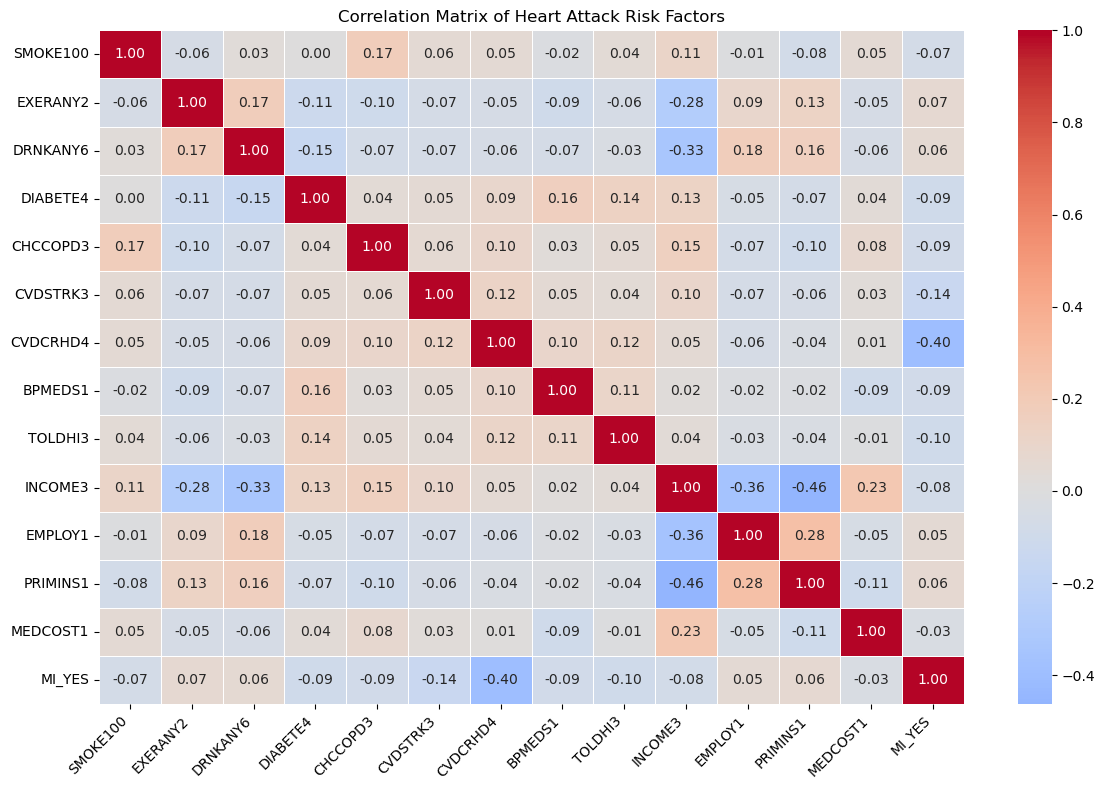

In [97]:
# Combine all relevant columns into one DataFrame for MI_YES
all_cols_mi = (
    lifestyle_cols   # ["SMOKE100","EXERANY2","DRNKANY6"]
    + chronic_cols   # ["DIABETE4","CHCCOPD3","CVDSTRK3","CVDCRHD4","BPMEDS1","TOLDHI3"]
    + social_cols    # ["INCOME3","EMPLOY1","PRIMINS1","MEDCOST1"]
    + ["MI_YES"]
)

df_corr_mi = (
    df_survey[all_cols_mi]
    .replace(invalid_values, np.nan)
    .dropna()
)

# Print correlation of each variable with MI_YES
print("Correlation with Heart Attack (All Risk Factors):")
mi_correlations = df_corr_mi.corr()["MI_YES"].drop("MI_YES")
print(mi_correlations.sort_values(ascending=False).round(3), "\n")

# Plot the full correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(
    df_corr_mi.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Correlation Matrix of Heart Attack Risk Factors")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [87]:
# Create binary outcome column
df_survey["KD_YES"] = (df_survey["CHCKDNY2"] == 1).astype(int)

# Invalid values
invalid_values = [7, 8, 9, 77, 88, 99]

# Lifestyle Factors Correlation
lifestyle_cols = ["SMOKE100", "EXERANY2", "DRNKANY6"]
df_lifestyle = df_survey[lifestyle_cols + ["KD_YES"]].replace(invalid_values, np.nan).dropna()

print("Correlation with Kidney Disease (Lifestyle Factors):")
for col in lifestyle_cols:
    corr, p = stats.pointbiserialr(df_lifestyle["KD_YES"], df_lifestyle[col])
    print(f"{col}: correlation = {corr:.3f}, p-value = {p:.4f}")

# Chronic Conditions Correlation
chronic_cols = ["DIABETE4", "CHCCOPD3", "CVDSTRK3", "CVDCRHD4", "BPMEDS1", "TOLDHI3"]
df_chronic = df_survey[chronic_cols + ["KD_YES"]].replace(invalid_values, np.nan).dropna()

print("\nCorrelation with Kidney Disease (Chronic Conditions):")
for col in chronic_cols:
    corr, p = stats.pointbiserialr(df_chronic["KD_YES"], df_chronic[col])
    print(f"{col}: correlation = {corr:.3f}, p-value = {p:.4f}")

# Socioeconomic Factors Correlation
social_cols = ["INCOME3", "EMPLOY1", "PRIMINS1", "MEDCOST1"]
df_social = df_survey[social_cols + ["KD_YES"]].replace(invalid_values, np.nan).dropna()

print("\nCorrelation with Kidney Disease (Socioeconomic Factors):")
for col in social_cols:
    corr, p = stats.pointbiserialr(df_social["KD_YES"], df_social[col])
    print(f"{col}: correlation = {corr:.3f}, p-value = {p:.4f}")

Correlation with Kidney Disease (Lifestyle Factors):
SMOKE100: correlation = -0.039, p-value = 0.0000
EXERANY2: correlation = 0.089, p-value = 0.0000
DRNKANY6: correlation = 0.082, p-value = 0.0000

Correlation with Kidney Disease (Chronic Conditions):
DIABETE4: correlation = -0.141, p-value = 0.0000
CHCCOPD3: correlation = -0.083, p-value = 0.0000
CVDSTRK3: correlation = -0.084, p-value = 0.0000
CVDCRHD4: correlation = -0.138, p-value = 0.0000
BPMEDS1: correlation = -0.066, p-value = 0.0000
TOLDHI3: correlation = -0.057, p-value = 0.0000

Correlation with Kidney Disease (Socioeconomic Factors):
INCOME3: correlation = -0.053, p-value = 0.0000
EMPLOY1: correlation = 0.034, p-value = 0.0000
PRIMINS1: correlation = 0.032, p-value = 0.0000
MEDCOST1: correlation = -0.017, p-value = 0.0000


Correlation with Kidney Disease (All Risk Factors):
DRNKANY6    0.091
EMPLOY1     0.067
EXERANY2    0.061
PRIMINS1    0.041
SMOKE100   -0.009
MEDCOST1   -0.014
TOLDHI3    -0.050
CHCCOPD3   -0.057
CVDSTRK3   -0.066
INCOME3    -0.075
BPMEDS1    -0.075
CVDCRHD4   -0.093
DIABETE4   -0.116
Name: KD_YES, dtype: float64 



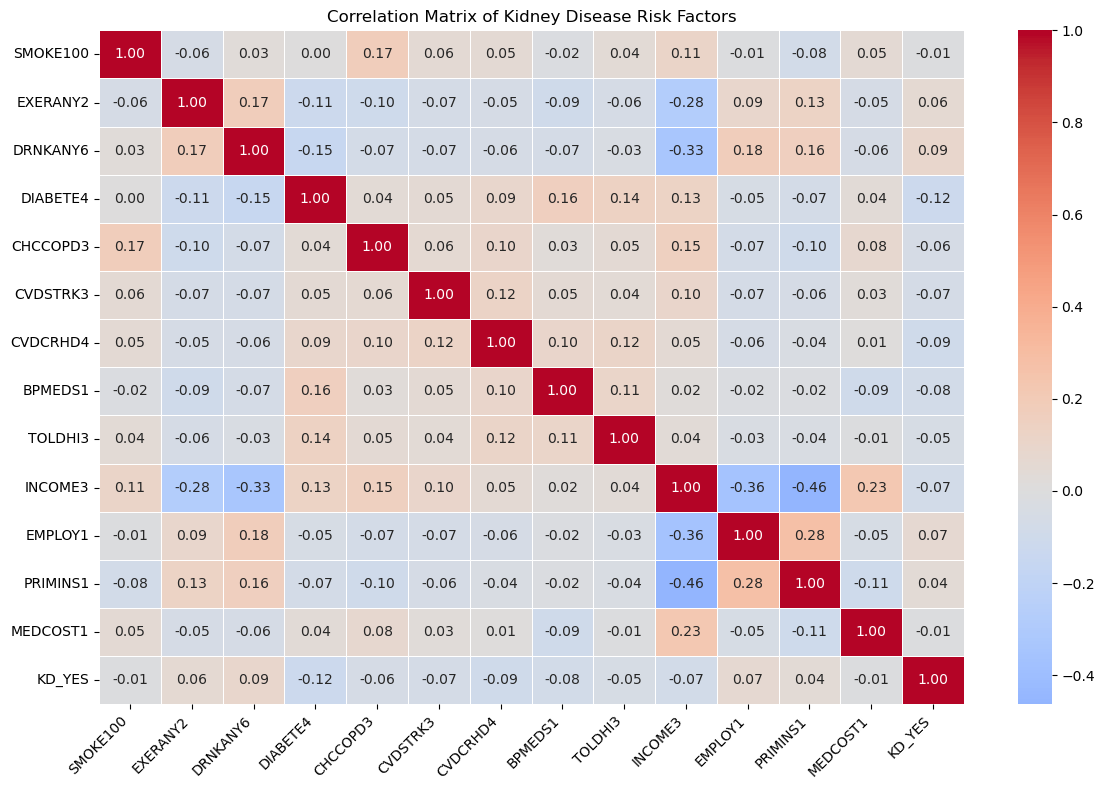

In [99]:
# Combine all relevant columns into one DataFrame for KD_YES
all_cols_kd = (
    lifestyle_cols   # ["SMOKE100","EXERANY2","DRNKANY6"]
    + chronic_cols   # ["DIABETE4","CHCCOPD3","CVDSTRK3","CVDCRHD4","BPMEDS1","TOLDHI3"]
    + social_cols    # ["INCOME3","EMPLOY1","PRIMINS1","MEDCOST1"]
    + ["KD_YES"]
)

df_corr_kd = (
    df_survey[all_cols_kd]
    .replace(invalid_values, np.nan)
    .dropna()
)

# Print correlation of each variable with KD_YES
print("Correlation with Kidney Disease (All Risk Factors):")
kd_correlations = df_corr_kd.corr()["KD_YES"].drop("KD_YES")
print(kd_correlations.sort_values(ascending=False).round(3), "\n")

# Plot the full correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(
    df_corr_kd.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Correlation Matrix of Kidney Disease Risk Factors")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [103]:
# Create binary outcome columns
df_survey["DUAL_DIAGNOSIS"] = ((df_survey["MI_YES"] == 1) & (df_survey["KD_YES"] == 1)).astype(int)

# Invalid values
invalid_values = [7, 8, 9, 77, 88, 99]

# Lifestyle Factors Correlation
lifestyle_cols = ["SMOKE100", "EXERANY2", "DRNKANY6"]
df_lifestyle = df_survey[lifestyle_cols + ["DUAL_DIAGNOSIS"]].replace(invalid_values, np.nan).dropna()

print("Correlation with Dual Diagnosis (Lifestyle Factors):")
for col in lifestyle_cols:
    corr, p = stats.pointbiserialr(df_lifestyle["DUAL_DIAGNOSIS"], df_lifestyle[col])
    print(f"{col}: correlation = {corr:.3f}, p-value = {p:.4f}")

# Chronic Conditions Correlation
chronic_cols = ["DIABETE4", "CHCCOPD3", "CVDSTRK3", "CVDCRHD4", "BPMEDS1", "TOLDHI3"]
df_chronic = df_survey[chronic_cols + ["DUAL_DIAGNOSIS"]].replace(invalid_values, np.nan).dropna()

print("\nCorrelation with Dual Diagnosis (Chronic Conditions):")
for col in chronic_cols:
    corr, p = stats.pointbiserialr(df_chronic["DUAL_DIAGNOSIS"], df_chronic[col])
    print(f"{col}: correlation = {corr:.3f}, p-value = {p:.4f}")

# Socioeconomic Factors Correlation
social_cols = ["INCOME3", "EMPLOY1", "PRIMINS1", "MEDCOST1"]
df_social = df_survey[social_cols + ["DUAL_DIAGNOSIS"]].replace(invalid_values, np.nan).dropna()

print("\nCorrelation with Dual Diagnosis (Socioeconomic Factors):")
for col in social_cols:
    corr, p = stats.pointbiserialr(df_social["DUAL_DIAGNOSIS"], df_social[col])
    print(f"{col}: correlation = {corr:.3f}, p-value = {p:.4f}")


Correlation with Dual Diagnosis (Lifestyle Factors):
SMOKE100: correlation = -0.036, p-value = 0.0000
EXERANY2: correlation = 0.057, p-value = 0.0000
DRNKANY6: correlation = 0.046, p-value = 0.0000

Correlation with Dual Diagnosis (Chronic Conditions):
DIABETE4: correlation = -0.092, p-value = 0.0000
CHCCOPD3: correlation = -0.074, p-value = 0.0000
CVDSTRK3: correlation = -0.099, p-value = 0.0000
CVDCRHD4: correlation = -0.227, p-value = 0.0000
BPMEDS1: correlation = -0.032, p-value = 0.0000
TOLDHI3: correlation = -0.045, p-value = 0.0000

Correlation with Dual Diagnosis (Socioeconomic Factors):
INCOME3: correlation = -0.029, p-value = 0.0000
EMPLOY1: correlation = 0.019, p-value = 0.0000
PRIMINS1: correlation = 0.016, p-value = 0.0000
MEDCOST1: correlation = -0.007, p-value = 0.0487


Correlation with Dual Diagnosis:
DRNKANY6    0.053
EXERANY2    0.052
EMPLOY1     0.036
PRIMINS1    0.027
MEDCOST1   -0.008
SMOKE100   -0.022
TOLDHI3    -0.030
BPMEDS1    -0.036
INCOME3    -0.042
CHCCOPD3   -0.050
CVDSTRK3   -0.064
DIABETE4   -0.074
CVDCRHD4   -0.168
Name: DUAL_DIAGNOSIS, dtype: float64




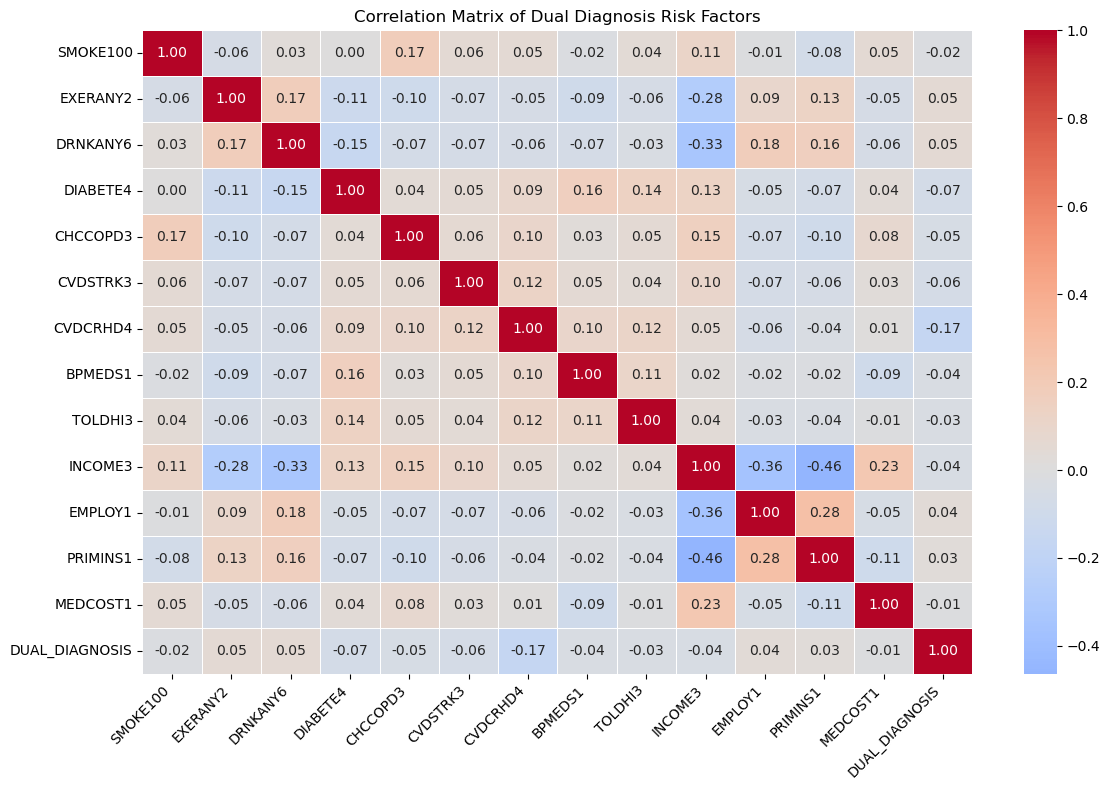

In [110]:
# Combine all relevant columns into one DataFrame
all_cols = [
    "SMOKE100", "EXERANY2", "DRNKANY6",                   # Lifestyle
    "DIABETE4", "CHCCOPD3", "CVDSTRK3", "CVDCRHD4",       # Chronic
    "BPMEDS1", "TOLDHI3",
    "INCOME3", "EMPLOY1", "PRIMINS1", "MEDCOST1",         # Socioeconomic
    "DUAL_DIAGNOSIS"
]

# Replace invalid BRFSS codes and drop missing
invalid_values = [7, 8, 9, 77, 88, 99]
df_corr = df_survey[all_cols].replace(invalid_values, np.nan).dropna()

# Print correlation of each variable with DUAL_DIAGNOSIS
print("Correlation with Dual Diagnosis:")
correlations = df_corr.corr()["DUAL_DIAGNOSIS"].drop("DUAL_DIAGNOSIS")
print(correlations.sort_values(ascending=False).round(3))
print("\n")

# Plot the full correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Matrix of Dual Diagnosis Risk Factors")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

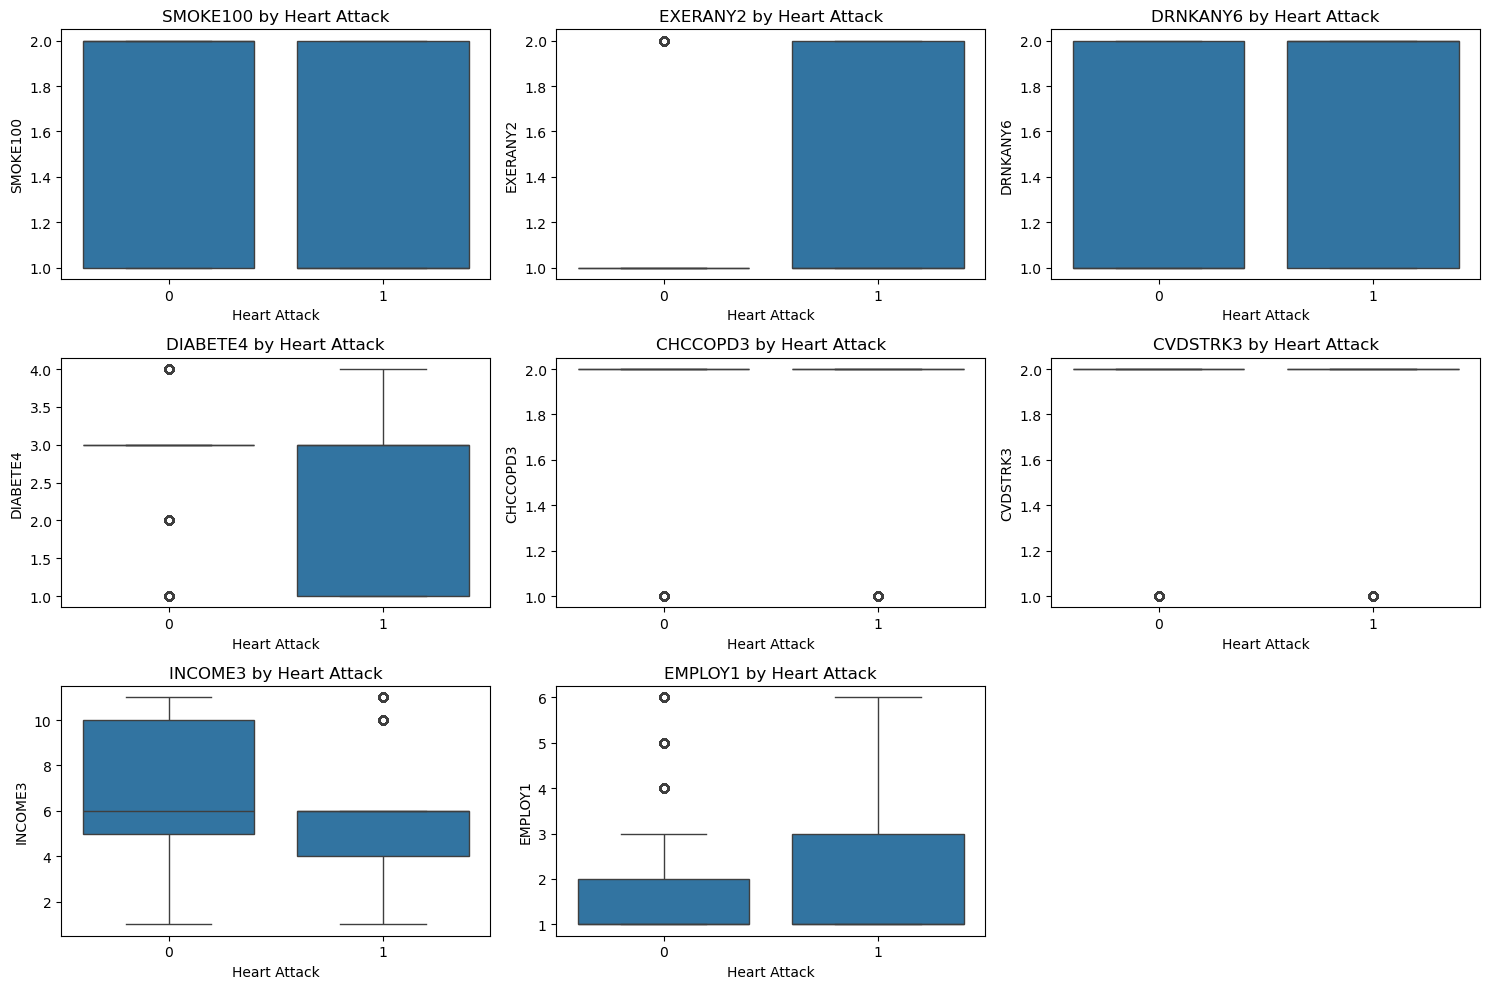

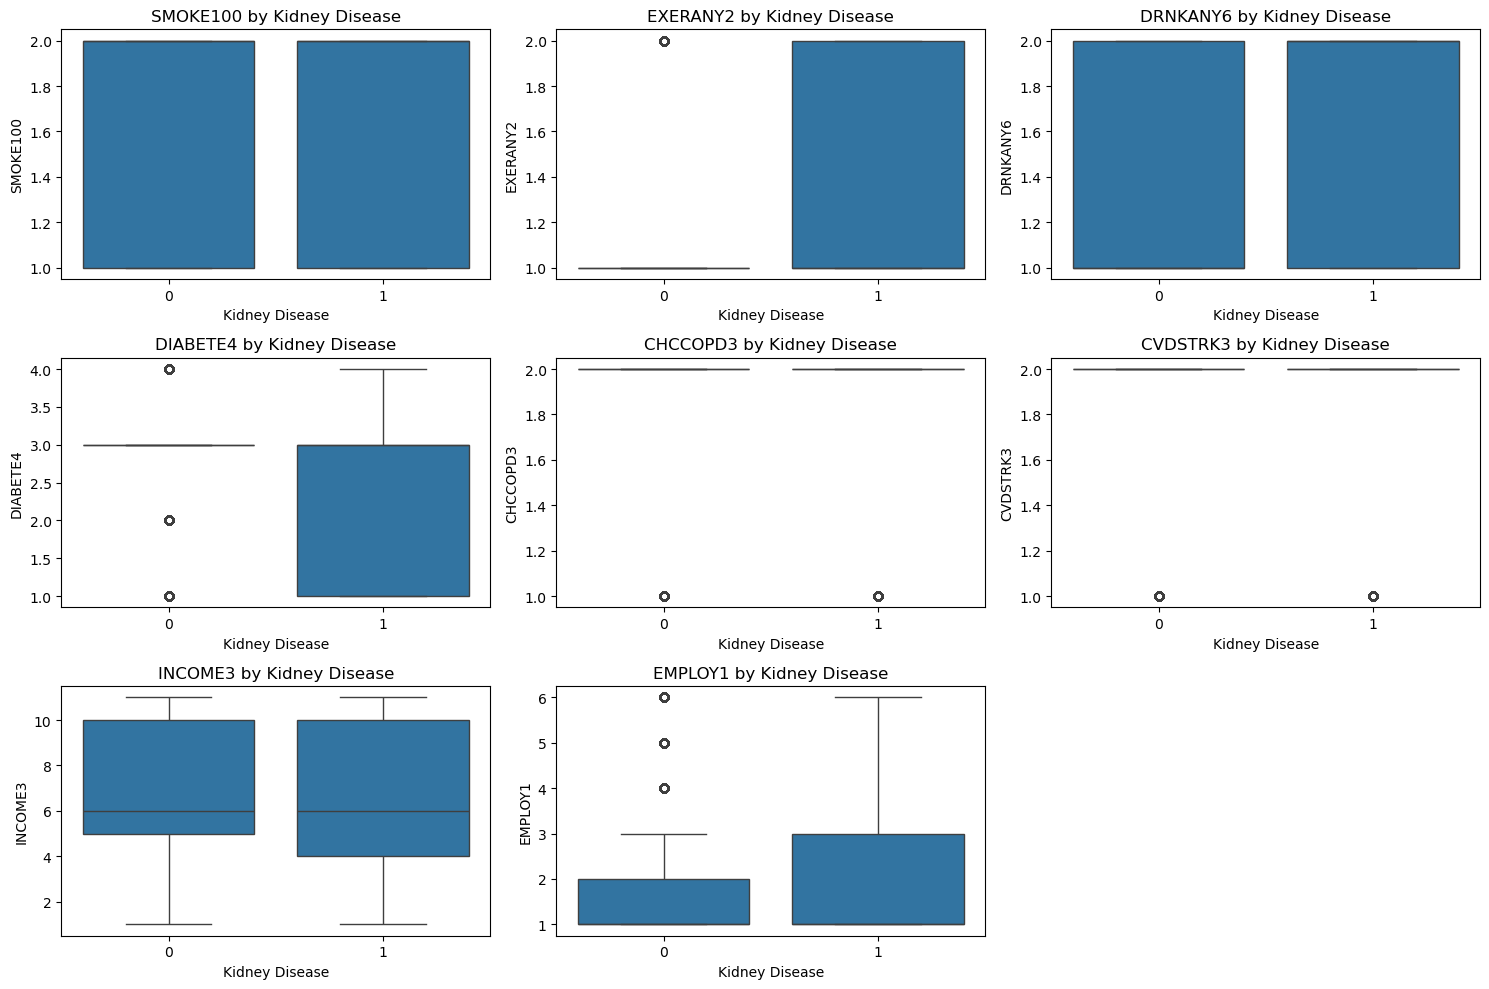

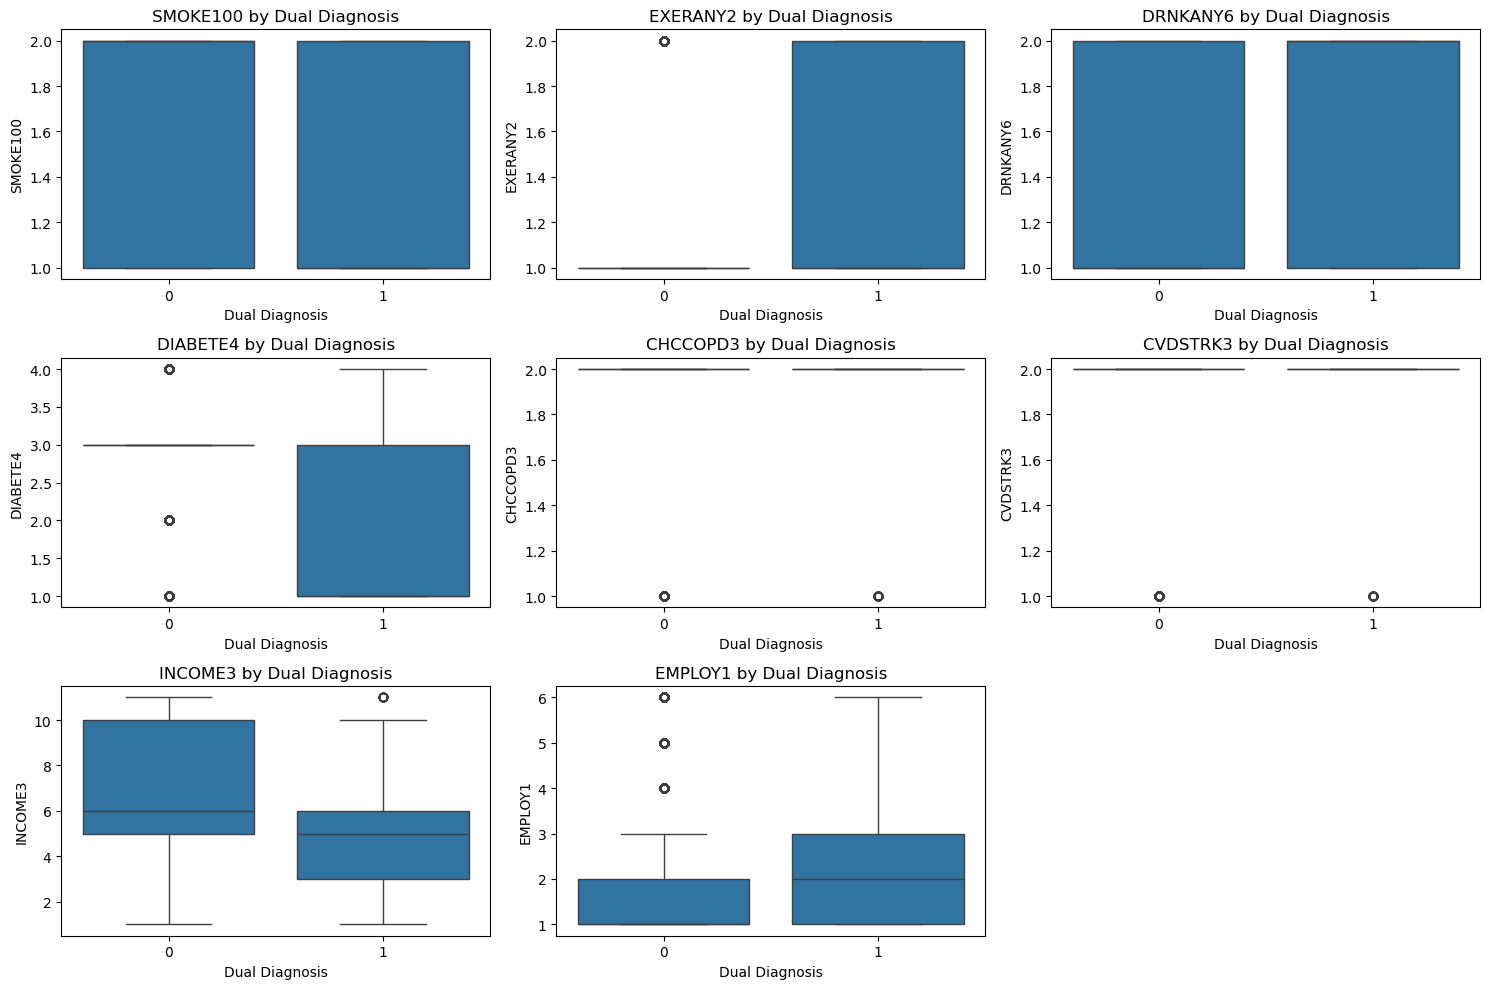

In [113]:
# Boxplots for MI_YES, KD_YES, DUAL_DIAGNOSIS
all_factors = ["SMOKE100", "EXERANY2", "DRNKANY6", "DIABETE4", "CHCCOPD3", "CVDSTRK3", "INCOME3", "EMPLOY1"]

for label_col, title in zip(["MI_YES", "KD_YES", "DUAL_DIAGNOSIS"],
                             ["Heart Attack", "Kidney Disease", "Dual Diagnosis"]):
    df_plot = df_survey[all_factors + [label_col]].replace(invalid_values, np.nan).dropna()
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(all_factors):
        plt.subplot(3, 3, i+1)
        sns.boxplot(data=df_plot, x=label_col, y=col)
        plt.title(f"{col} by {title}")
        plt.xlabel(title)
        plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [123]:
# PCA-Based Logistic Regression with Evaluation and Tuning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [125]:
# Extract features and target
features = [
    "SMOKE100", "EXERANY2", "DRNKANY6",                   # Lifestyle
    "DIABETE4", "CHCCOPD3", "CVDSTRK3", "CVDCRHD4",       # Chronic
    "BPMEDS1", "TOLDHI3",
    "INCOME3", "EMPLOY1", "PRIMINS1", "MEDCOST1"          # Socioeconomic
]
target = "DUAL_DIAGNOSIS"

In [127]:
# Clean data
df_model = df_survey[features + [target]].replace(invalid_values, np.nan).dropna()
X = df_model[features]
y = df_model[target]

# Scale and apply PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
print(f"Original shape: {X_scaled.shape}, PCA shape: {X_pca.shape}")

Original shape: (23516, 13), PCA shape: (23516, 12)


In [129]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3)

In [131]:
# Logistic Regression baseline model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [133]:
# Evaluate baseline
y_pred_lr = lr.predict(X_test)
print("Logistic Regression (baseline):")
print(classification_report(y_test, y_pred_lr, zero_division=0))

Logistic Regression (baseline):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6996
           1       0.00      0.00      0.00        59

    accuracy                           0.99      7055
   macro avg       0.50      0.50      0.50      7055
weighted avg       0.98      0.99      0.99      7055



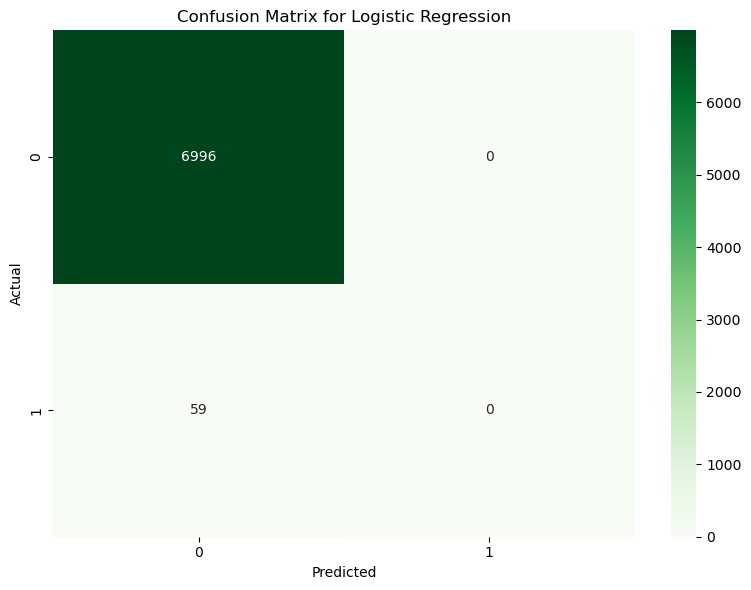

In [135]:
# Confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Greens', xticklabels=lr.classes_, yticklabels=lr.classes_)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [139]:
# Parameter search
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search_lr = GridSearchCV(
    LogisticRegression(max_iter=2000),
    param_grid_lr,
    cv=5,
    scoring='f1_macro',
    verbose=2,
    n_jobs=-1
)
grid_search_lr.fit(X_train, y_train)

print("Logistic Regression best CV score:", grid_search_lr.best_score_)
print("Logistic Regression test score:", grid_search_lr.score(X_test, y_test))
print("Best hyperparameters:", grid_search_lr.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Logistic Regression best CV score: 0.4980943378684177
Logistic Regression test score: 0.4979005053021137
Best hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


In [141]:
# Evaluate best estimator
y_pred_lr_best = grid_search_lr.predict(X_test)
print("Classification report (best estimator):")
print(classification_report(y_test, y_pred_lr_best, zero_division=0))

Classification report (best estimator):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6996
           1       0.00      0.00      0.00        59

    accuracy                           0.99      7055
   macro avg       0.50      0.50      0.50      7055
weighted avg       0.98      0.99      0.99      7055



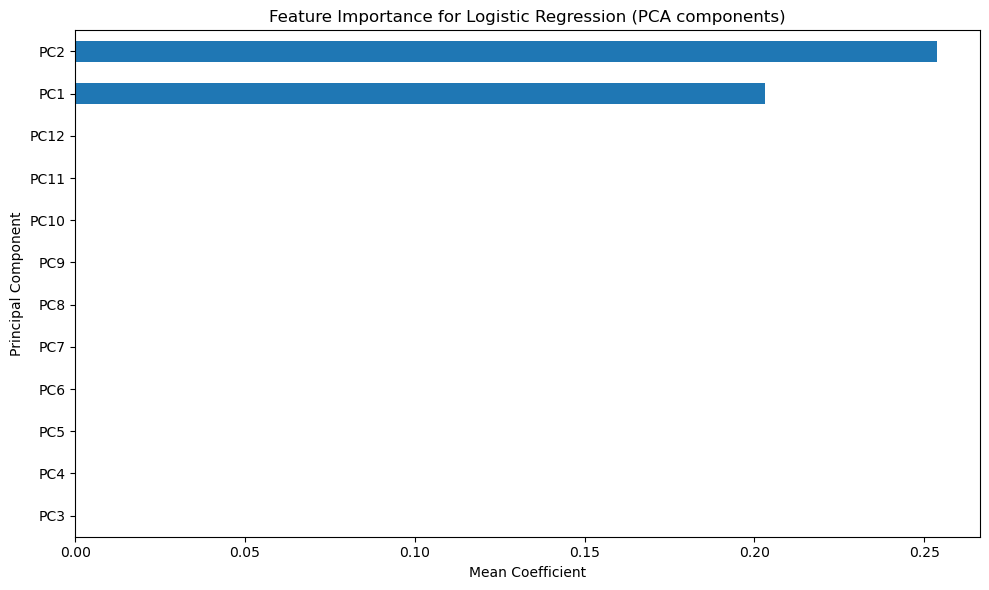

In [143]:
# Feature importance for PCA components
coefs = grid_search_lr.best_estimator_.coef_
x_features = [f"PC{i+1}" for i in range(X_pca.shape[1])]
feature_importances_lr = pd.Series(np.mean(np.abs(coefs), axis=0), index=x_features).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
feature_importances_lr.plot(kind='barh')
plt.title('Feature Importance for Logistic Regression (PCA components)')
plt.xlabel('Mean Coefficient')
plt.ylabel('Principal Component')
plt.tight_layout()
plt.show()

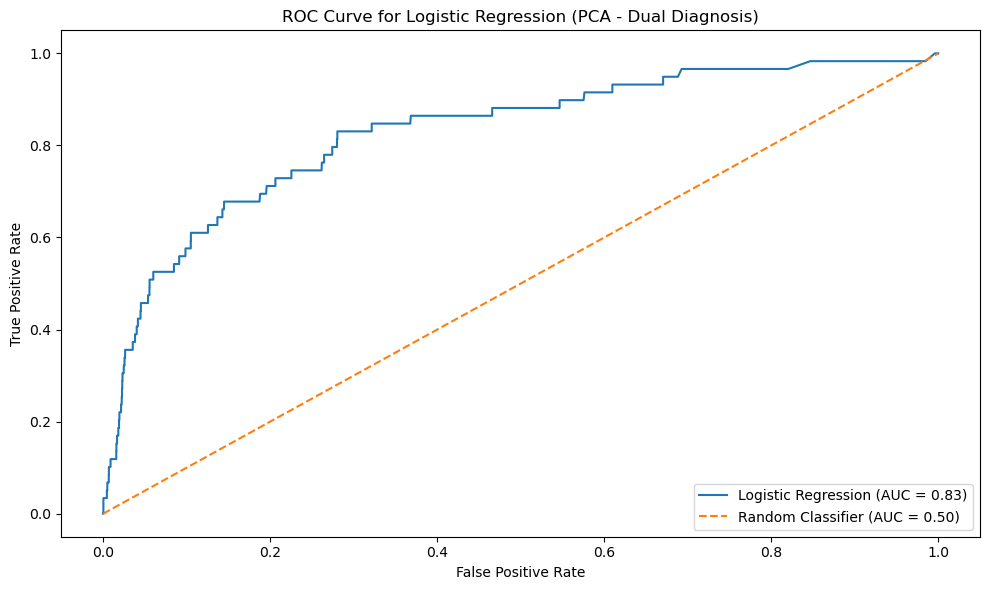

In [145]:
# ROC curve and AUC
y_score_lr = grid_search_lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier (AUC = 0.50)')
plt.title('ROC Curve for Logistic Regression (PCA - Dual Diagnosis)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [147]:
# Random Forest Classifier on Raw Features
from sklearn.ensemble import RandomForestClassifier

# Prepare raw input data (not PCA)
X_raw = df_model[features].values
y_raw = df_model[target]

In [149]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.3)
x_features = features

In [153]:
# Baseline Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [155]:
# Evaluate baseline
y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier (baseline):")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier (baseline):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7003
           1       0.29      0.04      0.07        52

    accuracy                           0.99      7055
   macro avg       0.64      0.52      0.53      7055
weighted avg       0.99      0.99      0.99      7055



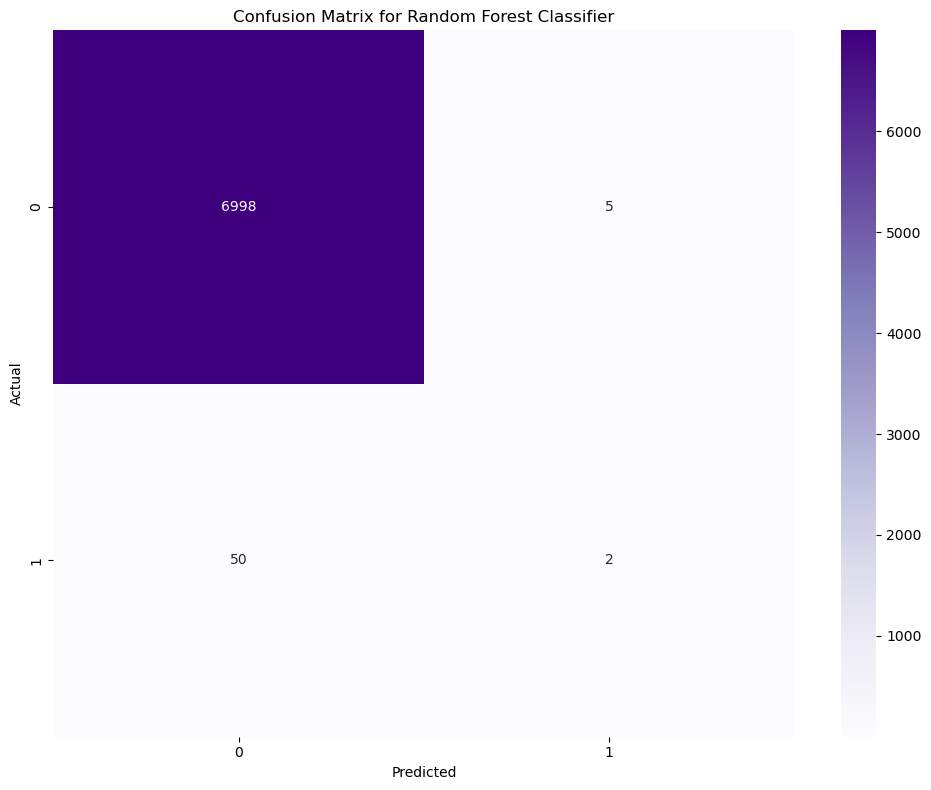

In [157]:
# Plot Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Purples', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [159]:
# Parameter search
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'max_features': ['sqrt', 'log2']
}

grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='f1_macro',
    verbose=2,
    n_jobs=-1
)
grid_search_rf.fit(X_train, y_train)

print("Random Forest best CV score:", grid_search_rf.best_score_)
print("Random Forest test score:", grid_search_rf.score(X_test, y_test))
print("Best hyperparameters:", grid_search_rf.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Random Forest best CV score: 0.49798719119768836
Random Forest test score: 0.4981505192772798
Best hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}


In [163]:
# Evaluate best estimator
y_pred_rf_best = grid_search_rf.predict(X_test)
print("Classification report (best estimator):")
print(classification_report(
    y_test,
    y_pred_rf_best,
    zero_division=0     
))

Classification report (best estimator):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7003
           1       0.00      0.00      0.00        52

    accuracy                           0.99      7055
   macro avg       0.50      0.50      0.50      7055
weighted avg       0.99      0.99      0.99      7055



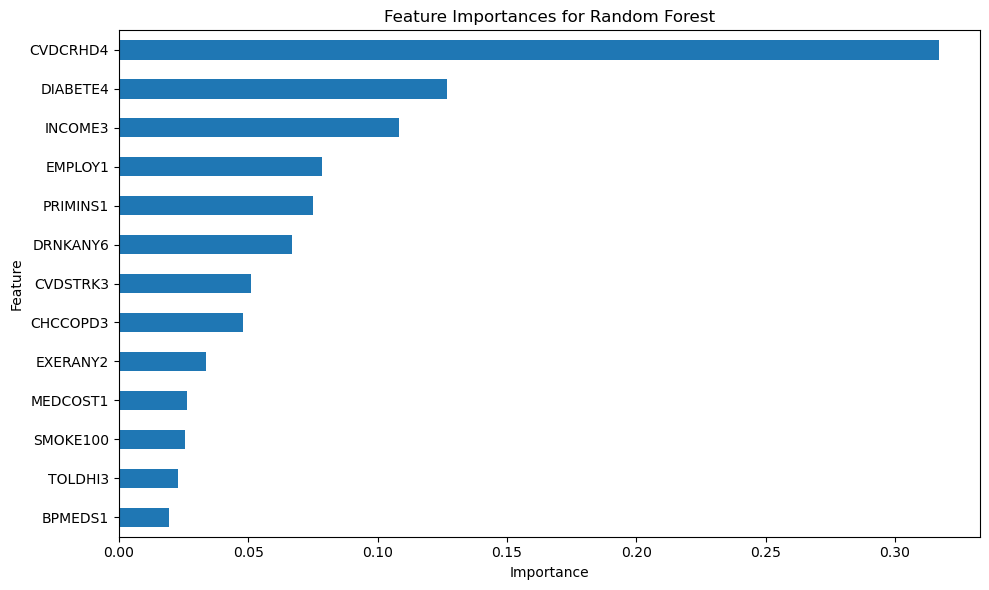

In [165]:
# Feature importance
feature_importances_rf = pd.Series(
    grid_search_rf.best_estimator_.feature_importances_,
    index=x_features
).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
feature_importances_rf.plot(kind='barh')
plt.title('Feature Importances for Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

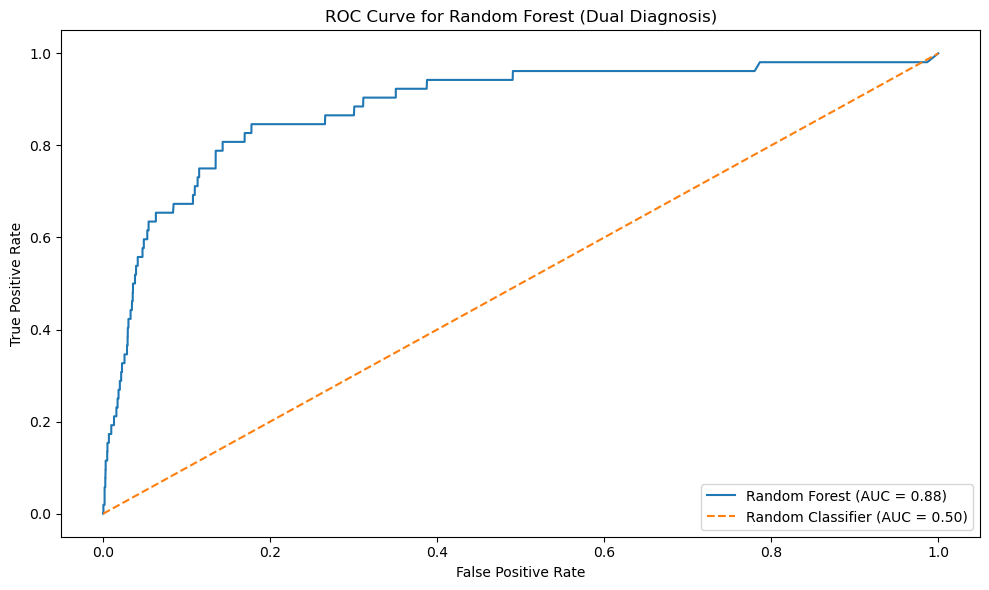

In [167]:
# ROC & AUC
y_score_rf = grid_search_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier (AUC = 0.50)')
plt.title('ROC Curve for Random Forest (Dual Diagnosis)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [169]:
# PCA-Based Logistic Regression with Heart Attack as Target
# Define predictors and target
mi_features = [
    "SMOKE100", "EXERANY2", "DRNKANY6",                   # Lifestyle
    "DIABETE4", "CHCCOPD3", "CVDSTRK3", "CVDCRHD4",       # Chronic
    "BPMEDS1", "TOLDHI3",
    "INCOME3", "EMPLOY1", "PRIMINS1", "MEDCOST1"          # Socioeconomic
]
mi_target = "MI_YES"

In [171]:
# Clean and prepare data for heart attack modeling
df_mi_model = df_survey[mi_features + [mi_target]].replace(invalid_values, np.nan).dropna()
X_mi_raw = df_mi_model[mi_features]
y_mi = df_mi_model[mi_target]

# Scale and apply PCA 
scaler_mi = StandardScaler()
X_mi_scaled = scaler_mi.fit_transform(X_mi_raw)

pca_mi = PCA(n_components=0.95)
X_mi_pca = pca_mi.fit_transform(X_mi_scaled)
print(f"[MI_YES] Original shape: {X_mi_scaled.shape}, PCA shape: {X_mi_pca.shape}")

[MI_YES] Original shape: (23516, 13), PCA shape: (23516, 12)


In [173]:
# Split dataset
X_train_mi, X_test_mi, y_train_mi, y_test_mi = train_test_split(X_mi_pca, y_mi, test_size=0.3)

In [ ]:
# --- Baseline Logistic Regression for MI_YES ---
lr_mi = LogisticRegression(max_iter=1000)
lr_mi.fit(X_train_mi, y_train_mi)

# --- Evaluation: Baseline ---
y_pred_mi_lr = lr_mi.predict(X_test_mi)
print("[MI_YES] Logistic Regression (baseline):")
print(classification_report(y_test_mi, y_pred_mi_lr, zero_division=0))

# --- Confusion Matrix ---
conf_matrix_mi = confusion_matrix(y_test_mi, y_pred_mi_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mi, annot=True, fmt='d', cmap='Greens', xticklabels=lr_mi.classes_, yticklabels=lr_mi.classes_)
plt.title('Confusion Matrix: Logistic Regression (Heart Attack)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# --- Grid Search: Logistic Regression Hyperparameters ---
param_grid_mi_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search_mi_lr = GridSearchCV(
    LogisticRegression(max_iter=2000),
    param_grid_mi_lr,
    cv=5,
    scoring='f1_macro',
    verbose=2,
    n_jobs=-1
)
grid_search_mi_lr.fit(X_train_mi, y_train_mi)

print("[MI_YES] Logistic Regression best CV score:", grid_search_mi_lr.best_score_)
print("[MI_YES] Logistic Regression test score:", grid_search_mi_lr.score(X_test_mi, y_test_mi))
print("[MI_YES] Best hyperparameters:", grid_search_mi_lr.best_params_)

# --- Evaluation: Best Estimator ---
y_pred_mi_best = grid_search_mi_lr.predict(X_test_mi)
print("[MI_YES] Classification report (best estimator):")
print(classification_report(y_test_mi, y_pred_mi_best, zero_division=0))

# --- Feature Importances: PCA Component Coefficients ---
mi_coefs = grid_search_mi_lr.best_estimator_.coef_
mi_pc_labels = [f"PC{i+1}" for i in range(X_mi_pca.shape[1])]
mi_feature_importances = pd.Series(np.mean(np.abs(mi_coefs), axis=0), index=mi_pc_labels).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
mi_feature_importances.plot(kind='barh')
plt.title('Feature Importances (PCA Components) - MI_YES')
plt.xlabel('Mean Coefficient')
plt.ylabel('Principal Component')
plt.tight_layout()
plt.show()

# --- ROC Curve and AUC ---
y_score_mi = grid_search_mi_lr.predict_proba(X_test_mi)[:, 1]
fpr_mi, tpr_mi, _ = roc_curve(y_test_mi, y_score_mi)
roc_auc_mi = auc(fpr_mi, tpr_mi)

plt.figure(figsize=(10, 6))
plt.plot(fpr_mi, tpr_mi, label=f'Logistic Regression (AUC = {roc_auc_mi:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier (AUC = 0.50)')
plt.title('ROC Curve - Logistic Regression (Heart Attack)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


In [ ]:
# --- Clean data ---
df_rf_mi = df_survey[mi_features + [mi_target]].replace(invalid_values, np.nan).dropna()
X_mi_raw = df_rf_mi[mi_features].values
y_mi = df_rf_mi[mi_target]
x_features_mi = mi_features

# --- Train/test split ---
X_train_mi, X_test_mi, y_train_mi, y_test_mi = train_test_split(X_mi_raw, y_mi, test_size=0.3, random_state=42)

# --- Baseline Random Forest ---
rf_mi = RandomForestClassifier(random_state=42)
rf_mi.fit(X_train_mi, y_train_mi)

# --- Evaluation: Baseline ---
y_pred_rf_mi = rf_mi.predict(X_test_mi)
print("[MI_YES] Random Forest Classifier (baseline):")
print(classification_report(y_test_mi, y_pred_rf_mi))

# --- Confusion Matrix ---
conf_matrix_rf_mi = confusion_matrix(y_test_mi, y_pred_rf_mi)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_rf_mi, annot=True, fmt='d', cmap='Purples', xticklabels=rf_mi.classes_, yticklabels=rf_mi.classes_)
plt.title('Confusion Matrix - Random Forest (Heart Attack)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# --- Grid Search: Random Forest Hyperparameters ---
param_grid_rf_mi = {
    'n_estimators': [100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'max_features': ['sqrt', 'log2']
}

grid_search_rf_mi = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf_mi,
    cv=5,
    scoring='f1_macro',
    verbose=2,
    n_jobs=-1
)
grid_search_rf_mi.fit(X_train_mi, y_train_mi)

print("[MI_YES] Random Forest best CV score:", grid_search_rf_mi.best_score_)
print("[MI_YES] Random Forest test score:", grid_search_rf_mi.score(X_test_mi, y_test_mi))
print("[MI_YES] Best hyperparameters:", grid_search_rf_mi.best_params_)

# --- Evaluation: Best Estimator ---
y_pred_rf_best_mi = grid_search_rf_mi.predict(X_test_mi)
print("[MI_YES] Classification report (best estimator):")
print(classification_report(y_test_mi, y_pred_rf_best_mi, zero_division=0))

# --- Feature Importance ---
mi_feature_importances = pd.Series(
    grid_search_rf_mi.best_estimator_.feature_importances_,
    index=x_features_mi
).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
mi_feature_importances.plot(kind='barh')
plt.title('Feature Importances - Random Forest (Heart Attack)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# --- ROC Curve & AUC ---
y_score_rf_mi = grid_search_rf_mi.predict_proba(X_test_mi)[:, 1]
fpr_rf_mi, tpr_rf_mi, _ = roc_curve(y_test_mi, y_score_rf_mi)
roc_auc_rf_mi = auc(fpr_rf_mi, tpr_rf_mi)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf_mi, tpr_rf_mi, label=f'Random Forest (AUC = {roc_auc_rf_mi:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier (AUC = 0.50)')
plt.title('ROC Curve - Random Forest (Heart Attack)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [ ]:
# PCA-Based Logistic Regression for Kidney Disease Target (KD_YES)
# --- Define predictors and kidney disease target ---
kd_features = [
    "SMOKE100", "EXERANY2", "DRNKANY6",                   # Lifestyle
    "DIABETE4", "CHCCOPD3", "CVDSTRK3", "CVDCRHD4",       # Chronic
    "BPMEDS1", "TOLDHI3",
    "INCOME3", "EMPLOY1", "PRIMINS1", "MEDCOST1"          # Socioeconomic
]
kd_target = "KD_YES"

# --- Clean and prepare data for kidney disease modeling ---
df_kd_model = df_survey[kd_features + [kd_target]].replace(invalid_values, np.nan).dropna()
X_kd_raw = df_kd_model[kd_features]
y_kd = df_kd_model[kd_target]

# --- Scale and apply PCA ---
scaler_kd = StandardScaler()
X_kd_scaled = scaler_kd.fit_transform(X_kd_raw)

pca_kd = PCA(n_components=0.95)
X_kd_pca = pca_kd.fit_transform(X_kd_scaled)
print(f"[KD_YES] Original shape: {X_kd_scaled.shape}, PCA shape: {X_kd_pca.shape}")

# --- Train/test split ---
X_train_kd, X_test_kd, y_train_kd, y_test_kd = train_test_split(X_kd_pca, y_kd, test_size=0.3, random_state=42)

# --- Baseline Logistic Regression for KD_YES ---
lr_kd = LogisticRegression(max_iter=1000)
lr_kd.fit(X_train_kd, y_train_kd)

# --- Evaluation: Baseline ---
y_pred_kd_lr = lr_kd.predict(X_test_kd)
print("[KD_YES] Logistic Regression (baseline):")
print(classification_report(y_test_kd, y_pred_kd_lr, zero_division=0))

# --- Confusion Matrix ---
conf_matrix_kd = confusion_matrix(y_test_kd, y_pred_kd_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_kd, annot=True, fmt='d', cmap='Blues', xticklabels=lr_kd.classes_, yticklabels=lr_kd.classes_)
plt.title('Confusion Matrix: Logistic Regression (Kidney Disease)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# --- Grid Search: Logistic Regression Hyperparameters ---
param_grid_kd_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}


In [ ]:
# --- Clean data ---
df_rf_kd = df_survey[kd_features + [kd_target]].replace(invalid_values, np.nan).dropna()
X_kd_raw = df_rf_kd[kd_features].values
y_kd = df_rf_kd[kd_target]
x_features_kd = kd_features

# --- Train/test split ---
X_train_kd, X_test_kd, y_train_kd, y_test_kd = train_test_split(X_kd_raw, y_kd, test_size=0.3, random_state=42)

# --- Baseline Random Forest ---
rf_kd = RandomForestClassifier(random_state=42)
rf_kd.fit(X_train_kd, y_train_kd)

# --- Evaluation: Baseline ---
y_pred_rf_kd = rf_kd.predict(X_test_kd)
print("[KD_YES] Random Forest Classifier (baseline):")
print(classification_report(y_test_kd, y_pred_rf_kd))

# --- Confusion Matrix ---
conf_matrix_rf_kd = confusion_matrix(y_test_kd, y_pred_rf_kd)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_rf_kd, annot=True, fmt='d', cmap='Purples', xticklabels=rf_kd.classes_, yticklabels=rf_kd.classes_)
plt.title('Confusion Matrix - Random Forest (Kidney Disease)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# --- Grid Search: Random Forest Hyperparameters ---
param_grid_rf_kd = {
    'n_estimators': [100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'max_features': ['sqrt', 'log2']
}

grid_search_rf_kd = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf_kd,
    cv=5,
    scoring='f1_macro',
    verbose=2,
    n_jobs=-1
)
grid_search_rf_kd.fit(X_train_kd, y_train_kd)

print("[KD_YES] Random Forest best CV score:", grid_search_rf_kd.best_score_)
print("[KD_YES] Random Forest test score:", grid_search_rf_kd.score(X_test_kd, y_test_kd))
print("[KD_YES] Best hyperparameters:", grid_search_rf_kd.best_params_)

# --- Evaluation: Best Estimator ---
y_pred_rf_best_kd = grid_search_rf_kd.predict(X_test_kd)
print("[KD_YES] Classification report (best estimator):")
print(classification_report(y_test_kd, y_pred_rf_best_kd, zero_division=0))

# --- Feature Importance ---
kd_feature_importances = pd.Series(
    grid_search_rf_kd.best_estimator_.feature_importances_,
    index=x_features_kd
).sort_values(ascending=True)

plt.figure(figsize=(10, 6))
kd_feature_importances.plot(kind='barh')
plt.title('Feature Importances - Random Forest (Kidney Disease)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# --- ROC Curve & AUC ---
y_score_rf_kd = grid_search_rf_kd.predict_proba(X_test_kd)[:, 1]
fpr_rf_kd, tpr_rf_kd, _ = roc_curve(y_test_kd, y_score_rf_kd)
roc_auc_rf_kd = auc(fpr_rf_kd, tpr_rf_kd)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf_kd, tpr_rf_kd, label=f'Random Forest (AUC = {roc_auc_rf_kd:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier (AUC = 0.50)')
plt.title('ROC Curve - Random Forest (Kidney Disease)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
